In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import sqlite3

In [2]:
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)

In [3]:
def run_command(c):
    try:
        with sqlite3.connect('chinook.db') as conn:
            conn.isolation_level = None
            conn.execute(c)
    except Exception as e:
        print(e)

In [4]:
def show_tables():
    s = "SELECT name FROM sqlite_master WHERE type in (\'table\', \'view\')"
    return run_query(s)

In [5]:
show_tables()

,name
0,album
1,artist
2,customer
3,employee
4,genre
5,invoice
6,invoice_line
7,media_type
8,playlist
9,playlist_track


In [6]:
s = 'SELECT DISTINCT country FROM customer'
run_query(s)

,country
0,Brazil
1,Germany
2,Canada
3,Norway
4,Czech Republic
5,Austria
6,Belgium
7,Denmark
8,USA
9,Portugal


In [7]:
def txt_to_string(f):
    with open(f, 'r') as myfile:
        return myfile.read().replace('\n', chr(10))

In [8]:
print(txt_to_string('most_popular_genres_usa.txt'))

SELECT
	sum(ILTOT.sale_price) as genre_sell,
	G.name genre
FROM
	(
	SELECT
		(unit_price * quantity) sale_price,
		invoice_line_id,
		invoice_id,
		track_id
	FROM
		invoice_line
	) ILTOT JOIN
	track T ON ILTOT.track_id = T.track_id JOIN
	genre G ON T.genre_id = G.genre_id JOIN
	invoice I ON I.invoice_id = ILTOT.invoice_id JOIN
	customer C ON C.customer_id = I.customer_id
WHERE
	C.country = 'USA'
GROUP BY
	genre
ORDER BY 1 DESC


In [9]:
s = txt_to_string('most_popular_genres_usa.txt')
genre_sales = run_query(s)
genre_sales

,genre_sell,genre
0,555.39,Rock
1,128.70,Alternative & Punk
2,122.76,Metal
3,52.47,R&B/Soul
4,35.64,Blues
5,34.65,Alternative
6,21.78,Latin
7,21.78,Pop
8,19.80,Hip Hop/Rap
9,13.86,Jazz


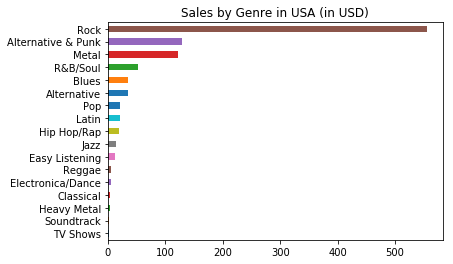

In [10]:
from matplotlib import pyplot as plt

genre_sales.sort_values('genre_sell',ascending=True).plot.barh('genre', 'genre_sell')
plt.title('Sales by Genre in USA (in USD)')
plt.ylabel('')
plt.legend().set_visible(False)

Based on the data above, which portrays USA users as very rockers, I would advertise the bands in the following order: Red Tone (Punk), Slim Jim Bites (Blues) and Meteor and the Girls (Pop).

In [11]:
s = txt_to_string('total_sales_by_sales_agent.txt')
agent_sales = run_query(s)
agent_sales

,employee_name,employee_title,employee_experience_years,total_sales
0,Jane Peacock,Sales Support Agent,1.783562,1731.51
1,Margaret Park,Sales Support Agent,1.695890,1584.00
2,Steve Johnson,Sales Support Agent,1.238356,1393.92


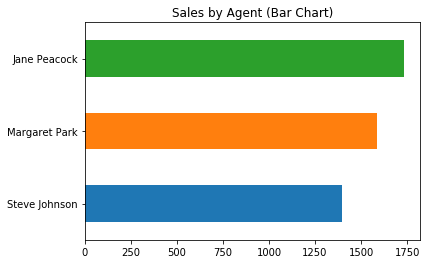

In [12]:
agent_sales.sort_values('total_sales',ascending=True).plot.barh('employee_name', 'total_sales')
plt.title('Sales by Agent (Bar Chart)')
plt.ylabel('')
plt.legend().set_visible(False)

Text(0, 0.5, '')

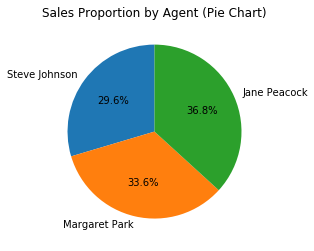

In [13]:
#Creating an ordered dataframe so the pie has the same colors of the bar chart
as_ordered = agent_sales.sort_values('total_sales',ascending=True)
plt.pie(as_ordered['total_sales'], labels=as_ordered['employee_name'], autopct='%.1f%%', startangle=90)
plt.title('Sales Proportion by Agent (Pie Chart)')
plt.ylabel('')

So, all three sellers sell approximately the same. There is some correlation based on experience time, I'll dive deeper into that.

In [14]:
s = txt_to_string('total_sales_by_sales_agent_by_month.txt')
as_by_month = run_query(s)
as_by_month

,employee_name,employee_title,employee_experience_then,invoice_date,invoice_date_trimester,total_sales
0,Jane Peacock,Sales Support Agent,3.8,4.0,4.25,12.87
1,Jane Peacock,Sales Support Agent,3.7,4.0,4.00,78.21
2,Margaret Park,Sales Support Agent,3.7,4.0,4.00,8.91
3,Jane Peacock,Sales Support Agent,3.6,3.9,4.00,33.66
4,Margaret Park,Sales Support Agent,3.6,4.0,4.00,43.56
5,Jane Peacock,Sales Support Agent,3.5,3.8,4.00,31.68
6,Margaret Park,Sales Support Agent,3.5,3.9,4.00,85.14
7,Jane Peacock,Sales Support Agent,3.4,3.7,3.75,24.75
8,Margaret Park,Sales Support Agent,3.4,3.8,4.00,44.55
9,Jane Peacock,Sales Support Agent,3.3,3.6,3.75,56.43


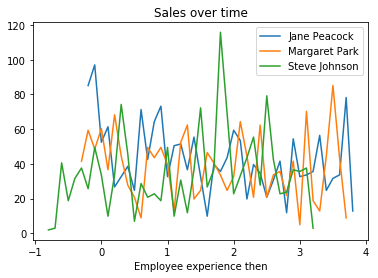

In [15]:
#import scipy
sales_agents = as_by_month['employee_name'].unique()
for agent in sales_agents:
    #as_by_month[as_by_month['employee_name']==agent]['total_sales'].sort_values(ascending=True).plot.kde(label=agent, legend=True)
    plt.plot(as_by_month[as_by_month['employee_name']==agent]['employee_experience_then'],as_by_month[as_by_month['employee_name']==agent]['total_sales'])
    plt.title('Sales over time')
    plt.xlabel('Employee experience then')
    plt.legend(sales_agents)

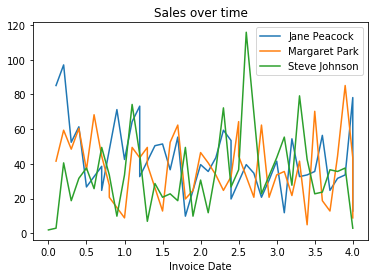

In [16]:
for agent in sales_agents:
    #as_by_month[as_by_month['employee_name']==agent]['total_sales'].sort_values(ascending=True).plot.kde(label=agent, legend=True)
    plt.plot(as_by_month[as_by_month['employee_name']==agent]['invoice_date'],as_by_month[as_by_month['employee_name']==agent]['total_sales'])
    plt.title('Sales over time')
    plt.xlabel('Invoice Date')
    plt.legend(sales_agents)

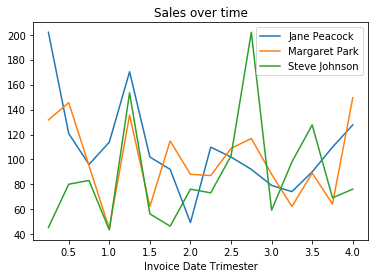

In [17]:
s = txt_to_string('total_sales_by_sales_agent_by_trimester.txt')
as_by_tri = run_query(s)
as_by_tri
for agent in sales_agents:
    plt.plot(as_by_tri[as_by_tri['employee_name']==agent]['invoice_date_trimester'],as_by_tri[as_by_tri['employee_name']==agent]['total_sales'])
    plt.title('Sales over time')
    plt.xlabel('Invoice Date Trimester')
    plt.legend(sales_agents)

In [18]:
best_seller = {}
worst_seller = {}
trimesters = as_by_tri['invoice_date_trimester'].unique()
for tri in trimesters:
    bestidx = as_by_tri[as_by_tri['invoice_date_trimester']==tri]['total_sales'].idxmax()
    worstidx = as_by_tri[as_by_tri['invoice_date_trimester']==tri]['total_sales'].idxmin()
    best = as_by_tri.loc[bestidx,'employee_name']
    worst = as_by_tri.loc[worstidx,'employee_name']
    if best not in best_seller:
        best_seller[best] = 1
    else:
        best_seller[best] += 1
    if worst not in worst_seller:
        worst_seller[worst] = 1
    else:
        worst_seller[worst] += 1
print(best_seller)
print(worst_seller)

{'Margaret Park': 6, 'Jane Peacock': 7, 'Steve Johnson': 3}
{'Steve Johnson': 9, 'Margaret Park': 4, 'Jane Peacock': 3}


In this DB, all 3 of them started working in January 2017, some of them before being hired, as interns (if the DB isn't corrupted). So, the total sales has nothing to do with experience. Then, regardless of experience time when invoice, Jane is the best seller. She has best been the best seller in 7 out of 16 trimesters since 2017 (yes, the DB has sales up to 2020), while Steve is the worst seller, having won only 3 of them. Also, Steve was the worst seller in 9 out of 16 trimesters. For Steve's sake, he fared really well in the beginning of 2018, having the best result on a trimester ever.

In [19]:
c = txt_to_string('view_customer_total.txt')
run_command(c)

table customer_total already exists


In [20]:
s = "SELECT * FROM customer_total"
run_query(s)

,customer_id,total_customer,num_orders
0,1,108.90,13
1,2,82.17,11
2,3,99.99,9
3,4,72.27,9
4,5,144.54,18
5,6,128.70,12
6,7,69.30,9
7,8,60.39,7
8,9,37.62,10
9,10,60.39,12


In [21]:
c = txt_to_string('view_customer_country.txt')
run_command(c)

table customer_country already exists


In [22]:
s = "SELECT * FROM customer_country"
run_query(s)

,customer_id,country
0,1,Brazil
1,2,Germany
2,3,Canada
3,4,Other
4,5,Czech Republic
5,6,Czech Republic
6,7,Other
7,8,Other
8,9,Other
9,10,Brazil


In [23]:
c = txt_to_string('view_country_sales_data.txt')
run_command(c)

In [24]:
s = "SELECT * FROM country_sales_data"
country_sales_data = run_query(s)
country_sales_data

,country,count_customers,total_country,total_per_customer,count_orders,total_per_order
0,USA,13,1040.49,80.037692,131,7.942672
1,Canada,8,535.59,66.948750,76,7.047237
2,Brazil,5,427.68,85.536000,61,7.011148
3,France,5,389.07,77.814000,50,7.781400
4,Germany,4,334.62,83.655000,41,8.161463
5,Czech Republic,2,273.24,136.620000,30,9.108000
6,United Kingdom,3,245.52,81.840000,28,8.768571
7,Portugal,2,185.13,92.565000,29,6.383793
8,India,2,183.15,91.575000,21,8.721429
9,Other,15,1094.94,72.996000,147,7.448571


In [25]:
c = "DROP VIEW country_sales_data"
run_command(c)

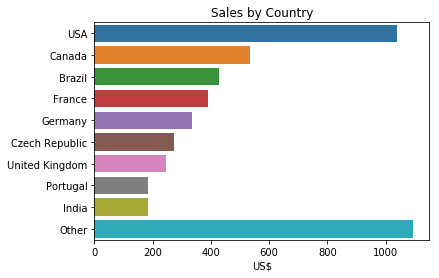

In [26]:
import seaborn as sns
import numpy as np
sns.barplot(y='country',x='total_country',data=country_sales_data)
plt.title('Sales by Country')
plt.ylabel('')
plt.xlabel('US$')
pal = sns.color_palette()


In [27]:
csd_not_other = country_sales_data[country_sales_data['country']!='Other']

Text(0.5, 0, 'US$')

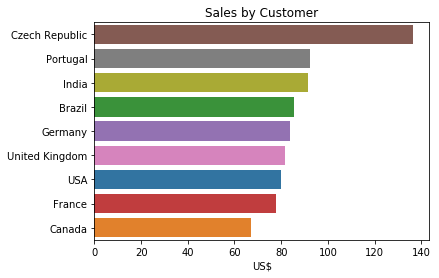

In [28]:
sns_order = csd_not_other.sort_values('total_per_customer',ascending=False)
rank = sns_order.index
sns.barplot(y='country',x='total_per_customer', order=sns_order['country'],data=csd_not_other,palette=np.array(pal)[rank])
plt.title('Sales by Customer')
plt.ylabel('')
plt.xlabel('US$')

Text(0.5, 0, 'US$')

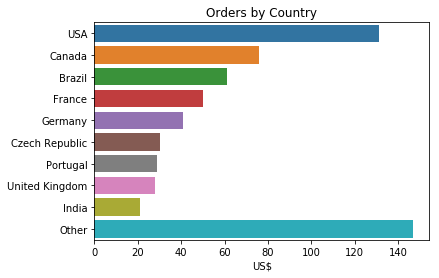

In [29]:
other = country_sales_data[country_sales_data['country']=='Other']
sns_order = csd_not_other.sort_values('count_orders',ascending=False)
sns_order = sns_order.append(other)
rank = sns_order.index
sns.barplot(y='country',x='count_orders', order=sns_order['country'],data=sns_order,palette=np.array(pal)[rank])
plt.title('Orders by Country')
plt.ylabel('')
plt.xlabel('US$')

Text(0.5, 0, 'US$')

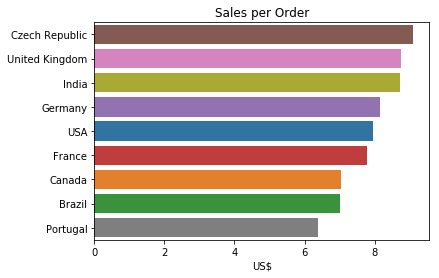

In [30]:
sns_order = csd_not_other.sort_values('total_per_order',ascending=False)
rank = sns_order.index
sns.barplot(y='country',x='total_per_order', order=sns_order['country'],data=csd_not_other,palette=np.array(pal)[rank])
plt.title('Sales per Order')
plt.ylabel('')
plt.xlabel('US$')

The sales per order don't vary much by country, which explains why Sales by Country and Orders by Country charts are very similar one another. Czechs buy more at the app, but is probably by making more orders, since the Sales by Customer chart is very unbalanced, while the Sales per Order isn't that much.

In [31]:
s = txt_to_string('percentage_of_album_invoices.txt')
album_invoices = run_query(s)
album_invoices

,n_invoice_more_than_1_album
0,443


In [38]:
c = txt_to_string('view_album_track_count.txt')
run_command(c)

In [39]:
s = 'SELECT * FROM album_track_count'
teste = run_query(s)
teste

,album_id,track_count
0,1,10
1,2,1
2,3,3
3,4,8
4,5,15
5,6,13
6,7,12
7,8,14
8,9,8
9,10,14


In [37]:
c = "DROP VIEW album_track_count"
run_command(c)

In [53]:
c = txt_to_string('view_distinct_invoice_track_count.txt')
run_command(c)

In [54]:
s = 'SELECT * FROM distinct_invoice_track_count'
teste = run_query(s)
teste

,invoice_id,album_id,track_count
0,1,91,16
1,2,20,1
2,2,34,1
3,2,39,1
4,2,66,1
5,2,73,1
6,2,134,1
7,2,190,1
8,2,215,1
9,2,218,1


In [52]:
c = "DROP VIEW distinct_invoice_track_count"
run_command(c)

In [47]:
s = txt_to_string('cache_sql.txt')
teste = run_query(s)
teste['track_count'].sum()

4757

In [59]:
s = txt_to_string('percentage_of_album_invoices.txt')
teste = run_query(s)
teste

,n_invoice_full_album,percentage_of_album_invoices
0,111,18.078176


Since invoices that are composed solely on full albums account only for 18% of total orders, I would advise against it. It's better to buy simple tracks, if the cost difference for that isn't significative.